## Can I get data augmentation for free?

    Essentially keras come with free data augmentation tools built into its data  generator. The one problem is that it 

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import random
import numpy as np
import sys
sys.path


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python36.zip',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [80]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        samplewise_std_normalization=False,
        samplewise_center=True,
        rotation_range=90.,
        width_shift_range=0.1,
        height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/data/jpegs_256_sym',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        follow_links=True)


Found 911099 images belonging to 101 classes.


In [81]:
X, y = train_generator.next()

In [82]:
train_generator.class_indices


{'ApplyEyeMakeup': 0,
 'ApplyLipstick': 1,
 'Archery': 2,
 'BabyCrawling': 3,
 'BalanceBeam': 4,
 'BandMarching': 5,
 'BaseballPitch': 6,
 'Basketball': 7,
 'BasketballDunk': 8,
 'BenchPress': 9,
 'Biking': 10,
 'Billiards': 11,
 'BlowDryHair': 12,
 'BlowingCandles': 13,
 'BodyWeightSquats': 14,
 'Bowling': 15,
 'BoxingPunchingBag': 16,
 'BoxingSpeedBag': 17,
 'BreastStroke': 18,
 'BrushingTeeth': 19,
 'CleanAndJerk': 20,
 'CliffDiving': 21,
 'CricketBowling': 22,
 'CricketShot': 23,
 'CuttingInKitchen': 24,
 'Diving': 25,
 'Drumming': 26,
 'Fencing': 27,
 'FieldHockeyPenalty': 28,
 'FloorGymnastics': 29,
 'FrisbeeCatch': 30,
 'FrontCrawl': 31,
 'GolfSwing': 32,
 'Haircut': 33,
 'HammerThrow': 34,
 'Hammering': 35,
 'HandstandPushups': 36,
 'HandstandWalking': 37,
 'HeadMassage': 38,
 'HighJump': 39,
 'HorseRace': 40,
 'HorseRiding': 41,
 'HulaHoop': 42,
 'IceDancing': 43,
 'JavelinThrow': 44,
 'JugglingBalls': 45,
 'JumpRope': 46,
 'JumpingJack': 47,
 'Kayaking': 48,
 'Knitting': 49,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


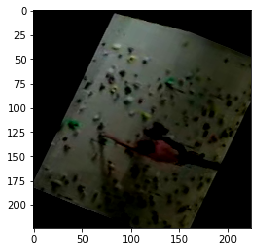

In [83]:
from matplotlib import pyplot as plt

plt.imshow(X[31])

In [84]:
y.shape


(32, 101)

In [7]:
import re 
import os
os.sep

'/'

In [9]:

def ucf101_sym_folder(data_dir, dest_dir):
    ''' creates sym linked directory for using image data generator on '''
    
    if not os.path.exists(dest):
        os.mkdir(dest_dir)
    # get name of all image directories
    directory_list = [name for name in os.listdir(data_dir) ]
    
    p = re.compile('v\_([a-zA-Z]*)\_g\w*_c0[1-2]')    

    directories = dict()
    
    # get unique class names and image directories that 
    # belong to the class
    for d in directory_list:
        f = p.match(d)
        if f:
            img_class = f[1]
            img_dir = f[0]
            if img_class not in directories:
                directories[img_class] = list()
            directories[img_class].append(img_dir)
    
    # create a directory for each class 
    for  img_class, folders in directories.items():
        symDir = dest + os.sep + img_class
        os.mkdir(symDir)
        for image_dir in folders:
            os.symlink(data_dir + os.sep + image_dir, \
                       symDir + os.sep + image_dir )          
    

In [10]:
data_dir = '/data/jpegs_256'
dest_dir = '/data/jpegs_256_sym'

In [50]:
# get name of all image directories
directory_list = [name for name in os.listdir(data_dir) ]

In [67]:
    
    p = re.compile('v\_([a-zA-Z]*)\_g\w*_c0[1-2]')    

    directories = dict()

In [68]:
for d in directory_list:
    f = p.match(d)
    if f:
        img_class = f[1]
        img_dir = f[0]
        if img_class not in directories:
            directories[img_class] = list()
        directories[img_class].append(img_dir)
            

In [69]:
directories

{'JavelinThrow': ['v_JavelinThrow_g05_c01',
  'v_JavelinThrow_g23_c01',
  'v_JavelinThrow_g25_c02',
  'v_JavelinThrow_g14_c02',
  'v_JavelinThrow_g12_c01',
  'v_JavelinThrow_g20_c01',
  'v_JavelinThrow_g22_c02',
  'v_JavelinThrow_g11_c01',
  'v_JavelinThrow_g04_c01',
  'v_JavelinThrow_g10_c01',
  'v_JavelinThrow_g13_c01',
  'v_JavelinThrow_g15_c01',
  'v_JavelinThrow_g05_c02',
  'v_JavelinThrow_g18_c01',
  'v_JavelinThrow_g04_c02',
  'v_JavelinThrow_g07_c02',
  'v_JavelinThrow_g21_c02',
  'v_JavelinThrow_g19_c02',
  'v_JavelinThrow_g16_c01',
  'v_JavelinThrow_g19_c01',
  'v_JavelinThrow_g13_c02',
  'v_JavelinThrow_g24_c01',
  'v_JavelinThrow_g06_c02',
  'v_JavelinThrow_g15_c02',
  'v_JavelinThrow_g25_c01',
  'v_JavelinThrow_g11_c02',
  'v_JavelinThrow_g20_c02',
  'v_JavelinThrow_g16_c02',
  'v_JavelinThrow_g01_c01',
  'v_JavelinThrow_g17_c01',
  'v_JavelinThrow_g23_c02',
  'v_JavelinThrow_g24_c02',
  'v_JavelinThrow_g02_c01',
  'v_JavelinThrow_g22_c01',
  'v_JavelinThrow_g08_c01',
  'v

In [79]:
    # create a directory for each class 
    for  img_class, folders in directories.items():
        symDir = dest + os.sep + img_class
        os.mkdir(symDir)
        for image_dir in folders:
            os.symlink(data_dir + os.sep + image_dir, \
                       symDir + os.sep + image_dir )   
        
        

## Using  training and test splits
    While that was great it gave us the whole data set to learn to, which while nice is probably a bit too much data to start 
    to see if the accuracy is approving. My reasoning being that classes become sparser per batch and thus the accuracy won't really improve appreciably under probably several epochs later (where an epoch takes hours!). Additionally last time I only took one random frame per image folder. What might be better is to take only 10 images per folder instead

In [2]:
training_file_split1 = '../keras_data_generator/ucf101_splits/trainlist01.txt'
test_file_split1 = ''

data_dir_root = '/data/jpegs_256'
# essentially go through split file
import csv 

# load Id list and labels 

train_list = list()

with open(training_file_split1, 'r') as f:
    reader = csv.reader(f)
    train_list = list(reader)
    
# now get folders

In [11]:
ucf101_sym_folder(data_dir, dest)

In [ ]:
def ucf101_sym_folder_with_list(data_dir, dest_dir, data_list_file_path):
    ''' creates sym linked directory for using image data generator on '''
    
    train_list = list()

    with open(data_list_file_path, 'r') as f:
        reader = csv.reader(f)
        train_list = list(reader)
        
    img_folders = [label[0].split(' ')[0] for label in train_list ]
    img_folders = [id.split('/')[1].rstrip('.avi') for id in img_folders ]
    
    # make dest directory if it doesn't exist 
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)

    # get name of all image directories
    directory_list = [name for name in os.listdir(data_dir) ]
    
    p = re.compile('v\_([a-zA-Z]*)\_g\w*_c0[1-2]')    

    directories = dict()
    
    # get unique class names and image directories that 
    # belong to the class
    for d in directory_list:
        f = p.match(d)
        if f:
            img_class = f[1]
            img_dir = f[0]
            if img_class not in directories:
                directories[img_class] = list()
            directories[img_class].append(img_dir)
    
    # create a directory for each class 
    for  img_class, folders in directories.items():
        symDir = dest + os.sep + img_class
        os.mkdir(symDir)
        for image_dir in folders:
            os.symlink(data_dir + os.sep + image_dir, \
                       symDir + os.sep + image_dir )      